In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [145]:
df= sns.load_dataset('Iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [146]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [147]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [148]:
#looking at the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [149]:
#converting into category
df['species']= df['species'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


Text(0.5, 1.0, 'Distribution for numerical columns')

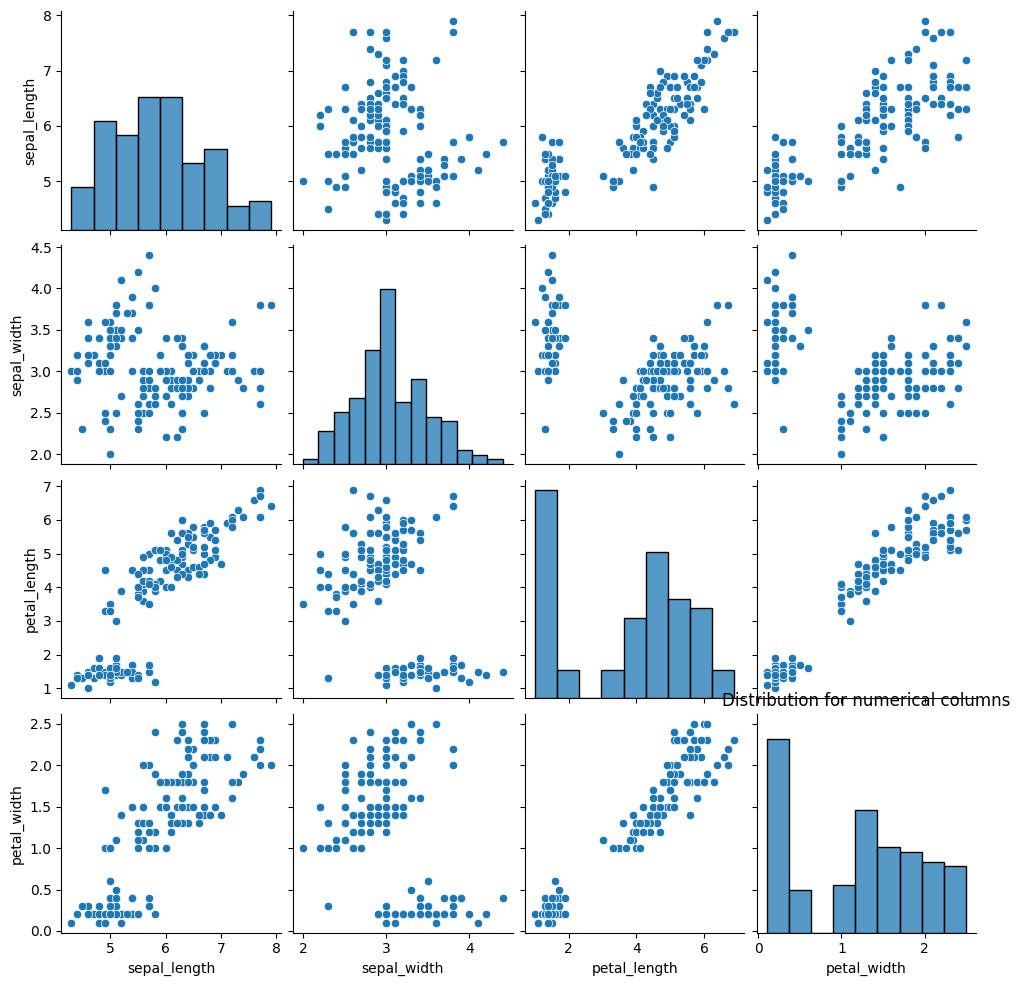

In [150]:
# looking at the distributions
num_columns= df.select_dtypes('number')

sns.pairplot(num_columns)
plt.title('Distribution for numerical columns')

[Text(0, 0, '50'), Text(0, 0, '50'), Text(0, 0, '50')]

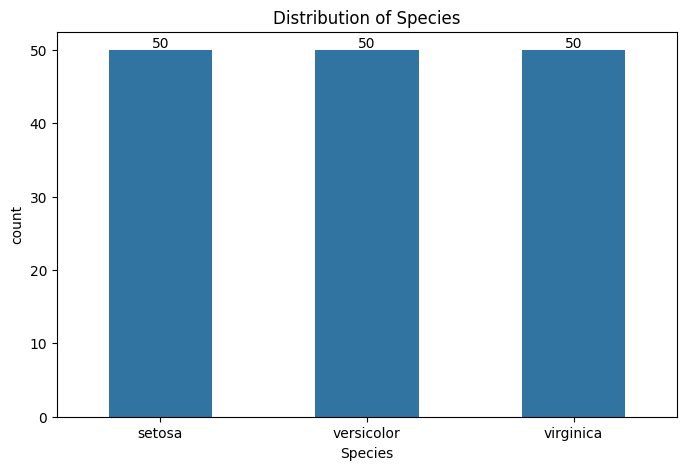

In [151]:
#looking at the countplot for our target column
fig, ax= plt.subplots(1, 1, figsize= (8,5))
sns.countplot(data= df, x= 'species', width= 0.5)
plt.title('Distribution of Species')
plt.xlabel('Species')
ax.bar_label(ax.containers[0])


In [152]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Doesnt look like it needs normalization

In [153]:
def softmax(z):
    #z is a m*k matrix here
    # as exp is an unstable function i.e- grows exponentially, we subtract max of z from each z row-wise to prevent overflow. Doesnt affect probabilities
    
    stable_z= z- np.max(z, axis= 1, keepdims= True)
    exp_z = np.exp(stable_z)
    softmax_z= exp_z/ np.sum(exp_z, axis=1, keepdims= True)
    return softmax_z 

In [154]:
def one_hot_encoding(y):
    unique_cats = np.unique(y.flatten())
    cats_to_index= {cat: i for i, cat in enumerate(unique_cats)}
    encoded= np.zeros((y.shape[0], len(unique_cats)))

    for i, cat in enumerate(y.flatten()):
        encoded[i, cats_to_index[cat]] = 1  
    
    return encoded, cats_to_index


In [155]:
#adding encoded species column to dataframe
y_encoded, cat_map= one_hot_encoding(df['species'].to_numpy())
new_columns= 'species_'+  np.array(list(cat_map.keys())).astype('str')
encoded_cols_df= pd.DataFrame(data= y_encoded, columns= new_columns)
df= pd.concat([df, encoded_cols_df], axis= 1)

In [163]:
#verifying the distribution still holds true
df[['species_setosa', 'species_versicolor', 'species_virginica']].apply(lambda col: col.value_counts() ,axis=0)

,species_setosa,species_versicolor,species_virginica
0.0,100,100,100
1.0,50,50,50


In [175]:
X= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
y= df[new_columns].to_numpy()

In [ ]:
# splitting train and tets data
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 42)
print(f'Shape of X_train= {X_train.shape}')
print(f'Shape of X_test= {X_test.shape}')

Shape of X_train= (112, 4)
Shape of X_test= (38, 4)


In [182]:
#adding a column of ones for bias
X_train= np.c_[np.ones(X_train.shape[0]) ,X_train]

In [ ]:
def compute_cost(p_pred, y_train):
    m= y_train.shape[0]
    return (-1/m)* np.sum( np.sum(y_train * np.log(p_pred), axis= 1))